In [1]:
from glob import glob
from tqdm import tqdm

import pandas as pd
import numpy as np

In [6]:
labels = pd.read_csv('./data/train.csv')
labels

,image,label
0,10027,3_b7_1
1,10037,3_00_0
2,10043,3_00_0
3,10045,3_00_0
4,10063,3_00_0
...,...,...
5762,67640,3_00_0
5763,67644,1_00_0
5764,67647,2_a5_2
5765,67649,1_00_0


In [16]:
a=sorted(labels['label'])
a
#labels['label']

['1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',
 '1_00_0',

In [7]:
crop = {'1':'딸기','2':'토마토','3':'파프리카','4':'오이','5':'고추','6':'시설포도'}
disease = {'1':{'a1':'딸기잿빛곰팡이병','a2':'딸기흰가루병','b1':'냉해피해','b6':'다량원소결핍 (N)','b7':'다량원소결핍 (P)','b8':'다량원소결핍 (K)'},
           '2':{'a5':'토마토흰가루병','a6':'토마토잿빛곰팡이병','b2':'열과','b3':'칼슘결핍','b6':'다량원소결핍 (N)','b7':'다량원소결핍 (P)','b8':'다량원소결핍 (K)'},
           '3':{'a9':'파프리카흰가루병','a10':'파프리카잘록병','b3':'칼슘결핍','b6':'다량원소결핍 (N)','b7':'다량원소결핍 (P)','b8':'다량원소결핍 (K)'},
           '4':{'a3':'오이노균병','a4':'오이흰가루병','b1':'냉해피해','b6':'다량원소결핍 (N)','b7':'다량원소결핍 (P)','b8':'다량원소결핍 (K)'},
           '5':{'a7':'고추탄저병','a8':'고추흰가루병','b3':'칼슘결핍','b6':'다량원소결핍 (N)','b7':'다량원소결핍 (P)','b8':'다량원소결핍 (K)'},
           '6':{'a11':'시설포도탄저병','a12':'시설포도노균병','b4':'일소피해','b5':'축과병'}}
risk = {'1':'초기','2':'중기','3':'말기'}

In [20]:
train_label_encoder = {}
label_cnt = 0
previous_label = '0_00_0'
for i, label in enumerate(tqdm(sorted(labels['label']))) :
    crop_val = label.split('_')[0] # crop
    disease_val = label.split('_')[1] # disease
    risk_val = label.split('_')[2] # risk
    
    tmp_label = f'{crop_val}_{disease_val}_{risk_val}'
    if previous_label != tmp_label :
        train_label_encoder[tmp_label] = label_cnt
        previous_label = tmp_label
        label_cnt += 1
        
train_label_decoder = {val : key for key, val in train_label_encoder.items()}
display(train_label_decoder)
display(train_label_encoder)
    
    

100%|██████████████████████████████████████████████████████████████████████████| 5767/5767 [00:00<00:00, 824141.44it/s]


{0: '1_00_0',
 1: '2_00_0',
 2: '2_a5_2',
 3: '3_00_0',
 4: '3_a9_1',
 5: '3_a9_2',
 6: '3_a9_3',
 7: '3_b3_1',
 8: '3_b6_1',
 9: '3_b7_1',
 10: '3_b8_1',
 11: '4_00_0',
 12: '5_00_0',
 13: '5_a7_2',
 14: '5_b6_1',
 15: '5_b7_1',
 16: '5_b8_1',
 17: '6_00_0',
 18: '6_a11_1',
 19: '6_a11_2',
 20: '6_a12_1',
 21: '6_a12_2',
 22: '6_b4_1',
 23: '6_b4_3',
 24: '6_b5_1'}

{'1_00_0': 0,
 '2_00_0': 1,
 '2_a5_2': 2,
 '3_00_0': 3,
 '3_a9_1': 4,
 '3_a9_2': 5,
 '3_a9_3': 6,
 '3_b3_1': 7,
 '3_b6_1': 8,
 '3_b7_1': 9,
 '3_b8_1': 10,
 '4_00_0': 11,
 '5_00_0': 12,
 '5_a7_2': 13,
 '5_b6_1': 14,
 '5_b7_1': 15,
 '5_b8_1': 16,
 '6_00_0': 17,
 '6_a11_1': 18,
 '6_a11_2': 19,
 '6_a12_1': 20,
 '6_a12_2': 21,
 '6_b4_1': 22,
 '6_b4_3': 23,
 '6_b5_1': 24}

In [49]:
import torch
import torch.nn as nn

data1 = torch.randn(16, 9, 144)
data2 = torch.randn(16, 9, 144)
print(data.shape)


bils_s = nn.Sequential(
    nn.LSTM(144, 121, bidirectional=True),
    nn.LSTM(121*2, 100, bidirectional=True),
    nn.LSTM(100*2, 81, bidirectional=True)
)

ab=nn.LSTM(144, 121, bidirectional=True)
bc=nn.LSTM(121*2, 100, bidirectional=True)
cd=nn.LSTM(100*2, 81, bidirectional=True)


ls = nn.LSTM(144, 512)
an = nn.Linear(144, 512)

x, b = ls(data1)
print("x shape : ", x.shape)
print("b shape : ", b[0].shape)
print()
x, b = bils_s(data2)
print("x shape : ", x.shape)
print("b shape : ", b[0].shape)
print()
x, b = ab(data2)
print("x shape : ", x.shape)
print("b shape : ", b[0].shape)

x, b = bc(x)
print("x shape : ", x.shape)
print("b shape : ", b[0].shape)

x, b = cd(x)
print("x shape : ", x.shape)
print("b shape : ", b[0].shape)


x = x.view(x.size(0), -1)
print(x.shape)

torch.Size([16, 9, 144])
x shape :  torch.Size([16, 9, 512])
b shape :  torch.Size([1, 9, 512])



AttributeError: 'tuple' object has no attribute 'size'

array([0.])

In [9]:
import cv2
from glob import glob
import numpy as np
import pandas as pd
from tqdm import tqdm
train_csvs = glob('./data/train/*/*.csv')

csv_len_chk = np.zeros(len(train_csvs))
for i, csv_path in tqdm(enumerate(train_csvs)) :
    csv = pd.read_csv(csv_path)
    csv_len_chk[i] = len(csv)

print(csv_len_chk.shape)

5767it [00:51, 111.95it/s]

(5767,)


In [18]:
uni = np.unique(csv_len_chk)
uni_encoder = {int(val) : 0 for val in uni}

for data in csv_len_chk :
    uni_encoder[int(data)] += 1
display(uni_encoder)

small_sum = 0
big_sum = 0
for k, v in uni_encoder.items() :
    if k < 290 :
        small_sum += v
    else : 
        big_sum += v
display(small_sum)
display(big_sum)

{1: 5,
 43: 1,
 45: 1,
 46: 1,
 74: 150,
 75: 2,
 77: 156,
 108: 10,
 109: 6,
 110: 7,
 111: 2,
 112: 12,
 113: 6,
 114: 6,
 115: 6,
 116: 2,
 117: 2,
 122: 3,
 123: 1,
 124: 2,
 125: 1,
 126: 4,
 127: 2,
 128: 1,
 136: 25,
 137: 31,
 138: 31,
 139: 14,
 140: 12,
 141: 12,
 142: 22,
 143: 14,
 144: 4,
 150: 2,
 151: 3,
 152: 25,
 153: 3,
 154: 14,
 155: 4,
 156: 7,
 157: 5,
 158: 7,
 159: 9,
 160: 8,
 161: 4,
 186: 1,
 187: 2,
 198: 4,
 199: 1,
 206: 22,
 215: 1,
 233: 83,
 240: 41,
 241: 11,
 245: 47,
 262: 27,
 263: 5,
 264: 2,
 273: 5,
 274: 2,
 275: 6,
 277: 3,
 278: 6,
 279: 4,
 280: 3,
 281: 4,
 282: 5,
 283: 8,
 284: 2,
 285: 13,
 286: 9,
 287: 10,
 291: 404,
 293: 36,
 294: 3562,
 295: 29,
 454: 19,
 456: 1,
 574: 156,
 577: 3,
 586: 4,
 588: 580,
 590: 1}

972

4795

In [29]:
import cv2
from glob import glob
import numpy as np
import pandas as pd
from tqdm import tqdm
import albumentations as A
import matplotlib.pyplot as plt


img_path = glob('./data/train/*/*.jpg')


[[[0.7254902  0.76470588 0.56862745]
  [0.72941176 0.76078431 0.57254902]
  [0.69803922 0.7254902  0.54117647]
  ...
  [0.02745098 0.41176471 0.29411765]
  [0.00392157 0.38039216 0.25490196]
  [0.01176471 0.36862745 0.25098039]]

 [[0.7254902  0.75686275 0.57254902]
  [0.7254902  0.75686275 0.57254902]
  [0.7254902  0.74901961 0.57254902]
  ...
  [0.02745098 0.40392157 0.27843137]
  [0.         0.36862745 0.24313725]
  [0.01176471 0.37254902 0.25490196]]

 [[0.72156863 0.75686275 0.58823529]
  [0.74117647 0.76470588 0.58823529]
  [0.70980392 0.74509804 0.57254902]
  ...
  [0.         0.35686275 0.22352941]
  [0.         0.34117647 0.21960784]
  [0.         0.36078431 0.24705882]]

 ...

 [[0.16862745 0.45882353 0.32156863]
  [0.16470588 0.47058824 0.34117647]
  [0.10196078 0.42352941 0.28627451]
  ...
  [0.         0.42352941 0.3372549 ]
  [0.05882353 0.49803922 0.40784314]
  [0.10196078 0.51764706 0.40784314]]

 [[0.16862745 0.47058824 0.32941176]
  [0.16078431 0.49411765 0.35686275]


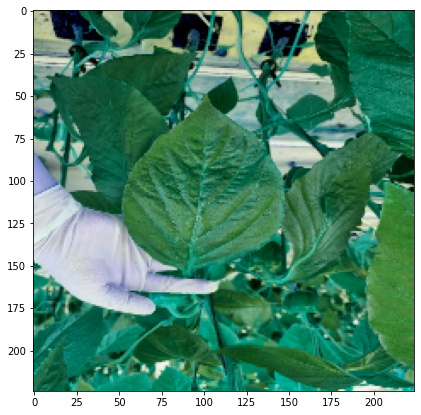

In [66]:
train_transforms = A.Compose([
                A.Resize(224 ,224),
#                 A.RandomRotate(),
                A.HorizontalFlip(),
                A.VerticalFlip(),
                A.ColorJitter(p=1),
#                 A.Normalize()
            ])

img = cv2.imread(img_path[0])
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
trans = train_transforms(image=img)['image']
new_trans = trans / 255.0
print(new_trans)
fig = plt.figure(figsize=(7,7))
plt.imshow(trans/255.0)
plt.show()

In [7]:
import torch

a = torch.tensor([2,4,6,8,10], dtype=torch.float32) / 2
a

tensor([1., 2., 3., 4., 5.])

In [12]:
jobs_1 = {'a': 1, 'b':2, 'c':3} # dictionary 형태

jobs_2 = [1,'a',3,'b',5] # list (= array)형태


print('dictionary의 key값이 출력됨')
for i in jobs_1 :

    print(i)

    
    
print("=" * 15)




print('list 안에 있는 각 요소가 출력됨')
for j in jobs_2 :
 
    print(j)




dictionary의 key값이 출력됨
a
b
c
list 안에 있는 각 요소가 출력됨
1
a
3
b
5


In [15]:
#!/usr/bin/env python

import glob
import json
import os
import uuid
import boto3
import datetime
import random
from urllib.parse import urlparse
import logging

from botocore.client import ClientError

logger = logging.getLogger()
logger.setLevel(logging.INFO)

S3 = boto3.resource('s3')

def handler(event, context):
    '''
    Watchfolder handler - this lambda is triggered when video objects are uploaded to the 
    SourceS3Bucket/inputs folder.

    It will look for two sets of file inputs:
        SourceS3Bucket/inputs/SourceS3Key:
            the input video to be converted
        
        SourceS3Bucket/jobs/*.json:
            job settings for MediaConvert jobs to be run against the input video. If 
            there are no settings files in the jobs folder, then the Default job will be run 
            from the job.json file in lambda environment. 
    
    Ouput paths stored in outputGroup['OutputGroupSettings']['DashIsoGroupSettings']['Destination']
    are constructed from the name of the job settings files as follows:
        
        s3://<MediaBucket>/<basename(job settings filename)>/<basename(input)>/<Destination value from job settings file>

    '''

    assetID = str(uuid.uuid4())
    sourceS3Bucket = event['Records'][0]['s3']['bucket']['name']
    sourceS3Key = event['Records'][0]['s3']['object']['key']
    sourceS3 = 's3://'+ sourceS3Bucket + '/' + sourceS3Key
    destinationS3 = 's3://' + os.environ['DestinationBucket']
    mediaConvertRole = os.environ['MediaConvertRole']
    application = os.environ['Application']
    region = os.environ['AWS_DEFAULT_REGION']
    statusCode = 200
    jobs = []
    job = {}
    
    # Use MediaConvert SDK UserMetadata to tag jobs with the assetID 
    # Events from MediaConvert will have the assetID in UserMedata
    jobMetadata = {}
    jobMetadata['assetID'] = assetID
    jobMetadata['application'] = application
    jobMetadata['input'] = sourceS3
    
    try:    
        
        # Build a list of jobs to run against the input.  Use the settings files in WatchFolder/jobs
        # if any exist.  Otherwise, use the default job.
        
        jobInput = {}
        # Iterates through all the objects in jobs folder of the WatchFolder bucket, doing the pagination for you. Each obj
        # contains a jobSettings JSON
        bucket = S3.Bucket(sourceS3Bucket)
        for obj in bucket.objects.filter(Prefix='jobs/'):
            if obj.key != "jobs/":
                jobInput = {}
                jobInput['filename'] = obj.key
                logger.info('jobInput: %s', jobInput['filename'])

                jobInput['settings'] = json.loads(obj.get()['Body'].read())
                logger.info(json.dumps(jobInput['settings'])) 
                
                jobs.append(jobInput)
        
        # Use Default job settings in the lambda zip file in the current working directory
        if not jobs:
            
            # job.json 파일을 json_data라는 변수에 넣어서 연다
            with open('job.json') as json_data:
                # jobInput 안에 있는 key값 중 file_name이라는 값이 있다면 default를 넣는다
                # 없다면 file_name이라는 키값을 새로 만들어서 거기에 default를 넣는다.
                jobInput['filename'] = 'Default'
                logger.info('jobInput: %s', jobInput['filename'])
                
                # jobInput 안에 있는 key값 중 settings 값이 있다면 job.json파일의 내용물을 넣는다
                # 없다면 settings이라는 키값을 새로 만들어서 거기에 job.json파일의 내용물을 넣는다.
                jobInput['settings'] = json.load(json_data)
                logger.info(json.dumps(jobInput['settings']))
                
                # 위에서 값을 세팅한 jobinput을 jobs라는 list에 넣는다
                jobs.append(jobInput)
                 
        # get the account-specific mediaconvert endpoint for this region
        mediaconvert_client = boto3.client('mediaconvert', region_name=region)
        endpoints = mediaconvert_client.describe_endpoints()

        # add the account-specific endpoint to the client session 
        client = boto3.client('mediaconvert', region_name=region, endpoint_url=endpoints['Endpoints'][0]['Url'], verify=False)
        
        # jobinput이라는 값을 넣은 jobs라는 리스트를 각 요소마다 순차적으로 호출한다
        for j in jobs:
            jobSettings = j['settings']
            jobFilename = j['filename']

            # Save the name of the settings file in the job userMetadata
            jobMetadata['settings'] = jobFilename

            # Update the job settings with the source video from the S3 event 
            jobSettings['Inputs'][0]['FileInput'] = sourceS3

            # Update the job settings with the destination paths for converted videos.  We want to replace the
            # destination bucket of the output paths in the job settings, but keep the rest of the
            # path
            destinationS3 = 's3://' + os.environ['DestinationBucket'] + '/' \
                + os.path.splitext(os.path.basename(sourceS3Key))[0] + '/' \
                + os.path.splitext(os.path.basename(jobFilename))[0]                 

            for outputGroup in jobSettings['OutputGroups']:
                
                logger.info("outputGroup['OutputGroupSettings']['Type'] == %s", outputGroup['OutputGroupSettings']['Type']) 
                
                if outputGroup['OutputGroupSettings']['Type'] == 'FILE_GROUP_SETTINGS':
                    templateDestination = outputGroup['OutputGroupSettings']['FileGroupSettings']['Destination']
                    templateDestinationKey = urlparse(templateDestination).path
                    logger.info("templateDestinationKey == %s", templateDestinationKey)
                    outputGroup['OutputGroupSettings']['FileGroupSettings']['Destination'] = destinationS3+templateDestinationKey

                elif outputGroup['OutputGroupSettings']['Type'] == 'HLS_GROUP_SETTINGS':
                    templateDestination = outputGroup['OutputGroupSettings']['HlsGroupSettings']['Destination']
                    templateDestinationKey = urlparse(templateDestination).path
                    logger.info("templateDestinationKey == %s", templateDestinationKey)
                    outputGroup['OutputGroupSettings']['HlsGroupSettings']['Destination'] = destinationS3+templateDestinationKey
                
                elif outputGroup['OutputGroupSettings']['Type'] == 'DASH_ISO_GROUP_SETTINGS':
                    templateDestination = outputGroup['OutputGroupSettings']['DashIsoGroupSettings']['Destination']
                    templateDestinationKey = urlparse(templateDestination).path
                    logger.info("templateDestinationKey == %s", templateDestinationKey)
                    outputGroup['OutputGroupSettings']['DashIsoGroupSettings']['Destination'] = destinationS3+templateDestinationKey

                elif outputGroup['OutputGroupSettings']['Type'] == 'DASH_ISO_GROUP_SETTINGS':
                    templateDestination = outputGroup['OutputGroupSettings']['DashIsoGroupSettings']['Destination']
                    templateDestinationKey = urlparse(templateDestination).path
                    logger.info("templateDestinationKey == %s", templateDestinationKey)
                    outputGroup['OutputGroupSettings']['DashIsoGroupSettings']['Destination'] = destinationS3+templateDestinationKey
                
                elif outputGroup['OutputGroupSettings']['Type'] == 'MS_SMOOTH_GROUP_SETTINGS':
                    templateDestination = outputGroup['OutputGroupSettings']['MsSmoothGroupSettings']['Destination']
                    templateDestinationKey = urlparse(templateDestination).path
                    logger.info("templateDestinationKey == %s", templateDestinationKey)
                    outputGroup['OutputGroupSettings']['MsSmoothGroupSettings']['Destination'] = destinationS3+templateDestinationKey
                    
                elif outputGroup['OutputGroupSettings']['Type'] == 'CMAF_GROUP_SETTINGS':
                    templateDestination = outputGroup['OutputGroupSettings']['CmafGroupSettings']['Destination']
                    templateDestinationKey = urlparse(templateDestination).path
                    logger.info("templateDestinationKey == %s", templateDestinationKey)
                    outputGroup['OutputGroupSettings']['CmafGroupSettings']['Destination'] = destinationS3+templateDestinationKey
                else:
                    logger.error("Exception: Unknown Output Group Type %s", outputGroup['OutputGroupSettings']['Type'])
                    statusCode = 500
            
            logger.info(json.dumps(jobSettings))

            # Convert the video using AWS Elemental MediaConvert
            job = client.create_job(Role=mediaConvertRole, UserMetadata=jobMetadata, Settings=jobSettings)

    except Exception as e:
        logger.error('Exception: %s', e)
        statusCode = 500
        raise

    finally:
        return {
            'statusCode': statusCode,
            'body': json.dumps(job, indent=4, sort_keys=True, default=str),
            'headers': {'Content-Type': 'application/json', 'Access-Control-Allow-Origin': '*'}
        }

ModuleNotFoundError: No module named 'boto3'

In [17]:
import json

In [20]:
a = {'settings': 1, 'file_name':2}

jobs = [a]

for j in jobs :
    abc = j['AASDFASDFAD']
print(abc)

KeyError: 'AASDFASDFAD'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

from tqdm import tqdm
from glob import glob
import os
import json 
import timm
import torch
from torch import nn
from torchvision import models
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.optim import AdamW

from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, StratifiedKFold
import albumentations as A

import timm

class DeiT(nn.Module):
    def __init__(self, model_name, n_classes):
        super(DeiT, self).__init__()
        self.model = timm.create_model(model_name, num_classes=n_classes, pretrained=True)
    
    def forward(self, inputs):
        output = self.model(inputs)
        return output
    
class EffiV2S(nn.Module):
    def __init__(self, model_name, n_classes):
        super(EffiV2S, self).__init__()
        self.model = timm.create_model(model_name, num_classes=n_classes, pretrained=True)
    
    def forward(self, inputs):
        output = self.model(inputs)
        return output
    
class total_model(nn.Module):
    def __init__(self, model_name_1, model_name_2, n_classes) :
        super(total_model, self).__init__()
        self.effi = EffiV2S(model_name_1, n_classes)
        self.DeiT = DeiT(model_name_2, n_classes)
        
    def forward(self, input_224, input_288) : 
        output1 = self.effi(input_288)
        output2 = self.DeiT(input_224)
        
        output = (output1 + output2) / 2
        return output
    

class EffiDeiT(nn.Module):
    def __init__(self, model_name_1, model_name_2, n_classes, test=False) :
        super(EffiDeiT, self).__init__()
        self.total_model = total_model(model_name_1, model_name_2, 38)
        
        if test == False :
            self.total_model.load_state_dict(torch.load(model_path, map_location=device))
            
        self.fc = nn.Linear(38, n_classes)
        
        
    def forward(self, input_224, input_288) :      
        output = self.total_model(input_224, input_288)
        output = self.fc(output)
        
        return output

In [2]:
from torchsummary import summary

model_name_1 = 'efficientnetv2_rw_s'
model_name_2 = 'deit_small_patch16_224'
device = torch.device("cuda:0")#("cpu")
n_classes = 25

kfold_models_path = glob('./*_public_vill_50k_pretrain_EffiDeit.pt')

models = []

for kfold_models in kfold_models_path :
    model = EffiDeiT(model_name_1, model_name_2, n_classes=25, test=True)
    model.load_state_dict(torch.load(kfold_models, map_location=device))
    model.to(device).eval()

    models.append(model)
models

[EffiDeiT(
   (total_model): total_model(
     (effi): EffiV2S(
       (model): EfficientNet(
         (conv_stem): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
         (bn1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         (act1): SiLU(inplace=True)
         (blocks): Sequential(
           (0): Sequential(
             (0): EdgeResidual(
               (conv_exp): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
               (bn1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
               (act1): SiLU(inplace=True)
               (se): Identity()
               (conv_pwl): Conv2d(24, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
               (bn2): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
             )
             (1): EdgeResidual(
               (conv_exp): Conv2d(24, 24, kernel_size=(3, 3), str

In [3]:

data1 = torch.randn(1, 3,224,224).to(device)
data2 = torch.randn(1,3,288,288).to(device)
output = []
for model in models :
    x = model(data1, data2)
    output.append(x)
    
output

[tensor([[ 1173389.1250,  -273215.1562,     2977.9973,   953316.7500,
            167690.9531,  -131608.3750,  -498525.9375,  -283581.0625,
            947225.6250,  -381620.3125,   326612.3750,    77963.3203,
           -336327.0000,  -333515.5000,   159638.1875,   569370.8750,
           -243476.6250,   338582.4688, -1154581.8750,  -451712.2500,
           -666621.8125,  -118928.4219,  -352386.0625,  -780691.1250,
           -725576.8750]], device='cuda:0', grad_fn=<AddmmBackward0>),
 tensor([[ 570733.9375,  427571.9688,   -3833.2676,  418758.1875,   93082.3281,
           478056.3125,  276937.2500, -217783.9219, -204514.1719,  -90050.9844,
           206893.8281,  317824.9375,   78130.6406, -317324.1250, -108946.7812,
           -49375.2031,   98895.5391,  179442.3750, -167703.2969, -401001.6250,
           -38831.2344,   -2213.3916,  -54178.9766, -178336.5625, -215779.5000]],
        device='cuda:0', grad_fn=<AddmmBackward0>),
 tensor([[ 111806.8203,  -40335.9219,   14603.8857,  28

In [6]:
for i in range(3):
    print(output[i].shape)

torch.Size([1, 25])
torch.Size([1, 25])
torch.Size([1, 25])


In [18]:
import cv2
import os
from glob import glob
import albumentations as A
import torch

path = './data/public/'

data = glob(path + '/*/*')

img = cv2.imread(data[0])

transforms = A.Compose([
                A.Resize(224 ,224),
                A.OneOf([
                    A.Rotate(),
                    A.HorizontalFlip(),
                    A.VerticalFlip()
                ], p=1),
                A.Normalize()
            ])

img = transforms(image=img)['image']
display(type(img))
display(type(torch.tensor(img)))
display(torch.tensor(img))
display(torch.tensor(img, dtype=torch.float32))

numpy.ndarray

torch.Tensor

tensor([[[ 0.2453,  0.9930,  0.5659],
         [ 0.2624,  1.0105,  0.5834],
         [ 0.3138,  1.0630,  0.6356],
         ...,
         [-0.7479,  0.1176, -0.3927],
         [-0.6623,  0.1527, -0.3404],
         [-0.6281,  0.1527, -0.3230]],

        [[ 0.1597,  0.9755,  0.5136],
         [ 0.1768,  0.9755,  0.5311],
         [ 0.2111,  1.0105,  0.5659],
         ...,
         [-0.7993,  0.0826, -0.4101],
         [-0.7479,  0.0826, -0.3927],
         [-0.6794,  0.1352, -0.3578]],

        [[ 0.1254,  0.9230,  0.4439],
         [ 0.1254,  0.9580,  0.4788],
         [ 0.1597,  0.9755,  0.5136],
         ...,
         [-0.8164,  0.0651, -0.4275],
         [-0.8507, -0.0049, -0.4624],
         [-0.7650,  0.0476, -0.4101]],

        ...,

        [[-0.0972,  0.5903,  0.1651],
         [-0.0629,  0.6078,  0.1825],
         [ 0.1426,  0.8179,  0.3916],
         ...,
         [-0.6109, -0.0224, -0.5670],
         [-0.5938, -0.0224, -0.5495],
         [-0.6281, -0.0399, -0.5844]],

        [[

tensor([[[ 0.2453,  0.9930,  0.5659],
         [ 0.2624,  1.0105,  0.5834],
         [ 0.3138,  1.0630,  0.6356],
         ...,
         [-0.7479,  0.1176, -0.3927],
         [-0.6623,  0.1527, -0.3404],
         [-0.6281,  0.1527, -0.3230]],

        [[ 0.1597,  0.9755,  0.5136],
         [ 0.1768,  0.9755,  0.5311],
         [ 0.2111,  1.0105,  0.5659],
         ...,
         [-0.7993,  0.0826, -0.4101],
         [-0.7479,  0.0826, -0.3927],
         [-0.6794,  0.1352, -0.3578]],

        [[ 0.1254,  0.9230,  0.4439],
         [ 0.1254,  0.9580,  0.4788],
         [ 0.1597,  0.9755,  0.5136],
         ...,
         [-0.8164,  0.0651, -0.4275],
         [-0.8507, -0.0049, -0.4624],
         [-0.7650,  0.0476, -0.4101]],

        ...,

        [[-0.0972,  0.5903,  0.1651],
         [-0.0629,  0.6078,  0.1825],
         [ 0.1426,  0.8179,  0.3916],
         ...,
         [-0.6109, -0.0224, -0.5670],
         [-0.5938, -0.0224, -0.5495],
         [-0.6281, -0.0399, -0.5844]],

        [[